# Descriptive analysis

This notebook is used primarily to calculate descriptive statistics for the dataset providing information on houses for sale in Denmark.

In [140]:
#Importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [188]:
#Importing dataset
pd.set_option('display.max_rows', None)
csv_file_path = '../outputdata/df_final.csv'
df_final = pd.read_csv(csv_file_path)
df_final.set_index('Unnamed: 0', inplace=True)
df_final.index.name = None

In [190]:
df_plotting = df_final
df_plotting['pris/m2'] = df_plotting['Price']/df_plotting['m2']

In [192]:
#Counting houses for sale in each Municipiality
print(df_final.groupby('Muncipiality')['pris/m2'].count())

Muncipiality
Aabenraa Kommune              76
Aalborg Kommune              385
Aarhus Kommune               607
Albertslund Kommune           12
Allerød Kommune               38
Assens Kommune                86
Ballerup Kommune              37
Billund Kommune               41
Bornholm Kommune              92
Brøndby Kommune               30
Brønderslev Kommune           87
Dragør Kommune                28
Egedal Kommune                83
Esbjerg Kommune              187
Faaborg-Midtfyn Kommune      104
Fanø Kommune                  10
Favrskov Kommune              92
Faxe Kommune                  84
Fredensborg Kommune           90
Fredericia Kommune            80
Frederiksberg Kommune        101
Frederikshavn Kommune        140
Frederikssund Kommune         81
Furesø Kommune                56
Gentofte Kommune             127
Gladsaxe Kommune              87
Glostrup Kommune              23
Greve Kommune                 84
Gribskov Kommune             105
Guldborgsund Kommune         1

C:\Users\matli\AppData\Local\Temp\ipykernel_62124\44930394.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plotting['pris/m2'], ax=ax[0], kde=True)
C:\Users\matli\AppData\Local\Temp\ipykernel_62124\44930394.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plotting['m2'], ax=ax[1])

18818.58991887704
5789.26282051282
Lolland Kommune
Gentofte Kommune


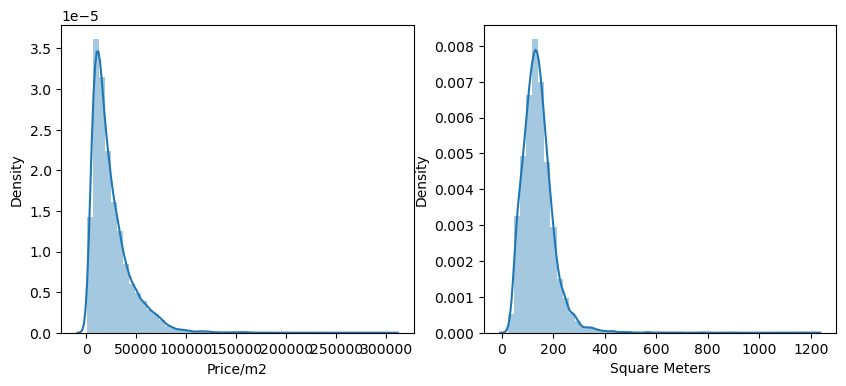

In [216]:
#Exploratory plotting
# Creating subplots without shared x-axis
#df_plotting['Price'] = df_plotting['Price'].clip(upper=15000000)
#df_plotting['m2'] = df_plotting['m2'].clip(upper=600)
#df_plotting['pris/m2'] = df_plotting['pris/m2'].clip(upper=100000)


# Define a formatter function to convert values to millions
def millions(x, pos):
    return f'{int(x / 1_000_000)}M'

# Apply the formatter to the axis
formatter = FuncFormatter(millions)


f, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plotting the distributions
sns.distplot(df_plotting['pris/m2'], ax=ax[0], kde=True)
sns.distplot(df_plotting['m2'], ax=ax[1])

# Formatting the x-axes (if needed)
#ax[0].xaxis.set_major_formatter(formatter)
ax[0].set_xlabel('Price/m2')
ax[1].set_xlabel('Square Meters')

print(df_final['pris/m2'].median())

df_median_price = df_final.groupby('Muncipiality')['pris/m2'].median()
df_median_price
print(df_median_price.min())
print(df_median_price.idxmin())
print(df_median_price.idxmax())

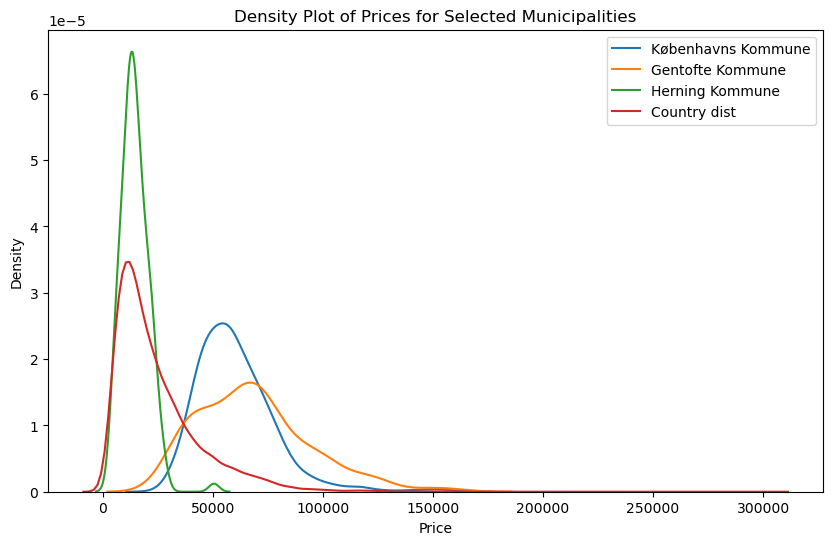

In [230]:
filter = ['Københavns Kommune', 'Gentofte Kommune', 'Herning Kommune']
df_filtered = df_plotting[df_plotting['Muncipiality'].isin(filter)]
plt.figure(figsize=(10,6))
# Plot the density for each filtered municipality with labels
for muncipiality in filter:
    sns.kdeplot(data=df_filtered[df_filtered['Muncipiality'] == muncipiality], x='pris/m2', label=muncipiality, fill=False)

sns.kdeplot(data=df_plotting, x='pris/m2', fill=False, label='Country dist')


"""
# Add vertical lines for the median of each municipality
for muncipiality in filter:
    median_value = df_filtered[df_filtered['Muncipiality'] == muncipiality]['pris/m2'].median()
    plt.axvline(median_value, linestyle='--', label=f'{muncipiality} Median: {median_value:.2f}')
"""

# Customize the plot
plt.legend()
plt.title('Density Plot of Prices for Selected Municipalities')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()